# Avocado

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier

Importing required modules

In [5]:
df=pd.read_csv(r"C:\Users\Minhaj\Downloads\avocado.csv.zip",index_col=0)

Importing dataset

In [3]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Sample data

In [4]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Column names of dataset

In [5]:
df.shape

(18249, 13)

Dataset have 18249 rows and 13 columns

In [6]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

dataset have float,int and categorical datatypes

As we want to predict the region we are building classification model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Datatypes,memory usage of dataset

In [8]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Statistical summary of numerical data

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No missing values present in dataset

In [10]:
df[df['XLarge Bags']==0]['XLarge Bags'].value_counts()

0.0    12048
Name: XLarge Bags, dtype: int64

We can observe the most of the Xlarge bags doesn't contain avocado

# EDA 

# Visualizations

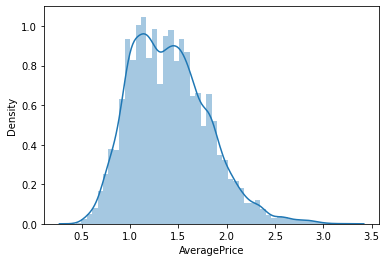

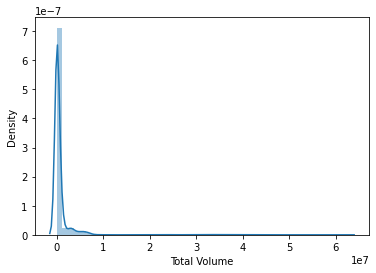

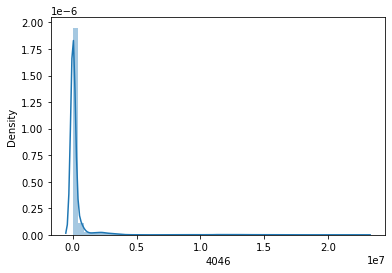

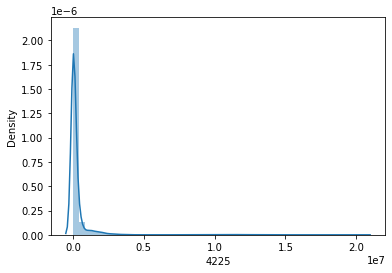

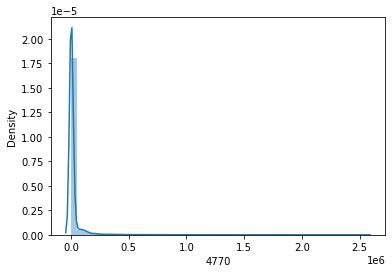

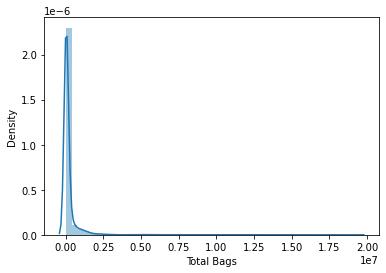

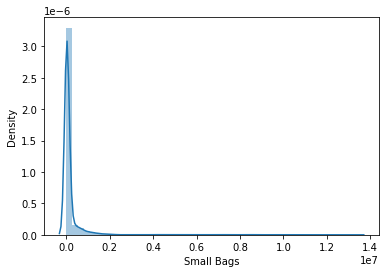

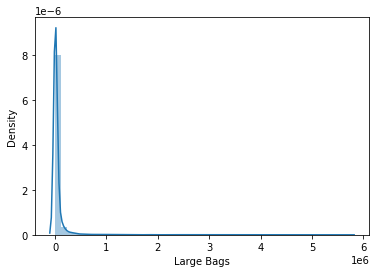

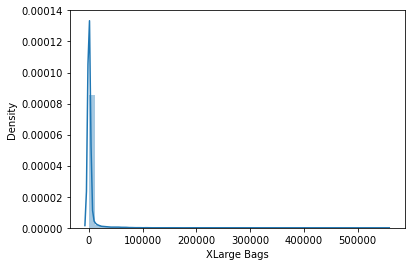

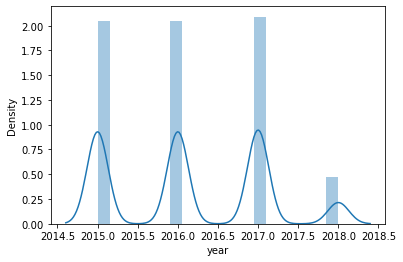

In [11]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

Datas are not normally distributed

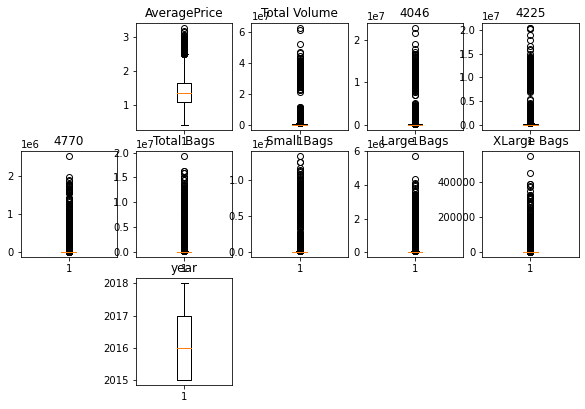

In [12]:
plt.figure(figsize=(10,9))
for i in range(len(df.columns)):
    if df.dtypes[i]!='object':
        plt.subplot(4,5,i+1)
        plt.boxplot(df[df.columns[i]])
        plt.title(df.columns[i])
plt.show()

We can detect outliers in columns

In [13]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [14]:
categorical=df[['Date','type','region']].copy()

Stored categorical datas 

In [15]:
print(categorical['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


types have two unique values

In [16]:
print(categorical['region'].value_counts())

Roanoke                338
Jacksonville           338
LasVegas               338
DallasFtWorth          338
RaleighGreensboro      338
Indianapolis           338
NorthernNewEngland     338
Detroit                338
Midsouth               338
Southeast              338
SanDiego               338
Pittsburgh             338
Syracuse               338
StLouis                338
Seattle                338
Tampa                  338
Atlanta                338
Columbus               338
Portland               338
Spokane                338
SouthCarolina          338
Houston                338
Boston                 338
Orlando                338
GrandRapids            338
BuffaloRochester       338
LosAngeles             338
Denver                 338
TotalUS                338
MiamiFtLauderdale      338
Northeast              338
West                   338
Philadelphia           338
HartfordSpringfield    338
Louisville             338
HarrisburgScranton     338
SanFrancisco           338
N

As our target variable is region, it is not balanced,in last region we can observe the imbalance

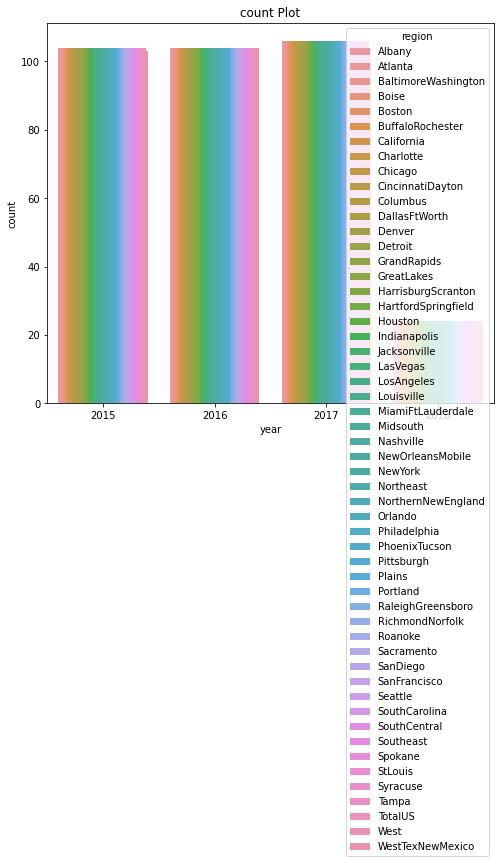

In [17]:
plt.figure(figsize=(8,7))
plt.title("count Plot")
sns.countplot('year',hue='region',data=df)
plt.show()

In year 2017 the most selling is done compare to other year

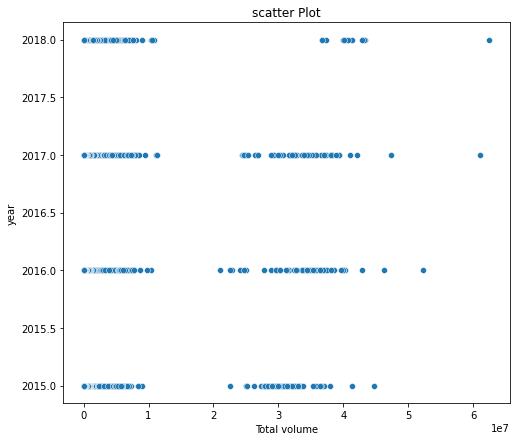

In [18]:
plt.figure(figsize=(8,7))
plt.xlabel("Total volume")
plt.ylabel("year")
plt.title("scatter Plot")
sns.scatterplot(x="Total Volume",y="year",data=df)
plt.show()

We can observe the total volume of each year

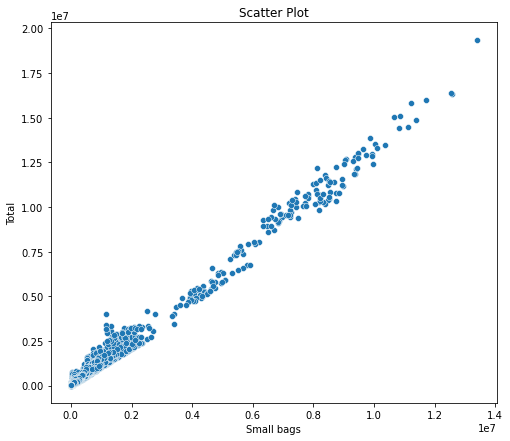

In [19]:
plt.figure(figsize=(8,7))
plt.xlabel("Small bags")
plt.ylabel("Total")
plt.title("Scatter Plot")
sns.scatterplot(x="Small Bags",y="Total Bags",data=df)
plt.show()

small bags and total numnber of bags have almost same number of avocados

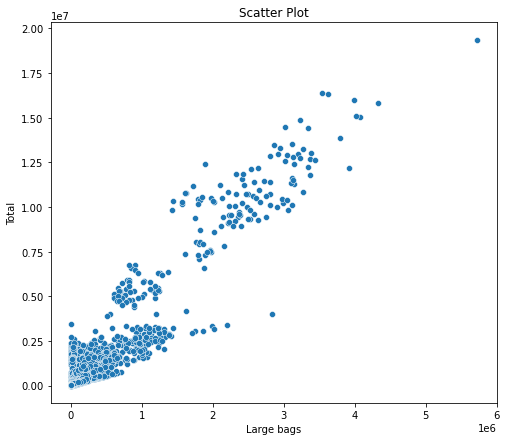

In [20]:
plt.figure(figsize=(8,7))
plt.xlabel("Large bags")
plt.ylabel("Total")
plt.title("Scatter Plot")
sns.scatterplot(x="Large Bags",y="Total Bags",data=df)
plt.show()

Total bags contains 0-2 large bags  

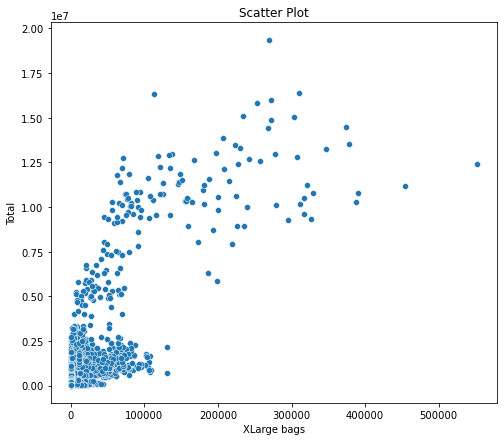

In [21]:
plt.figure(figsize=(8,7))
plt.xlabel("XLarge bags")
plt.ylabel("Total")
plt.title("Scatter Plot")
sns.scatterplot(x="XLarge Bags",y="Total Bags",data=df)
plt.show()

Realtion between xlarge and total bags

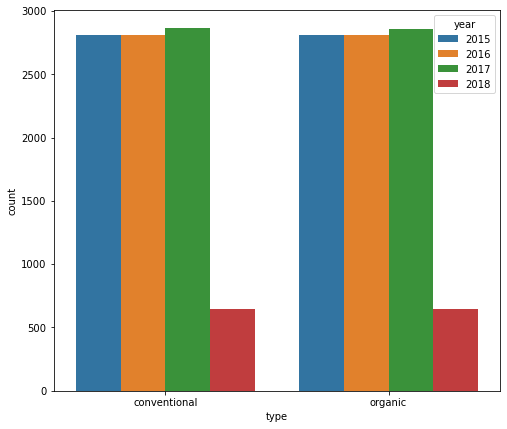

In [22]:
plt.figure(figsize=(8,7))
sns.countplot('type',data=df,hue='year')
plt.show()

Both Conventional and organic avocados were more sold in year 2017 and less sold in year 2018

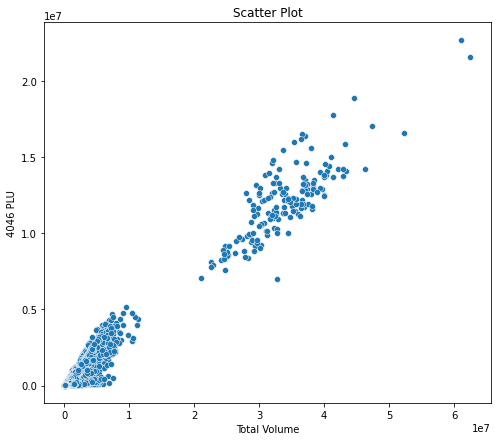

In [23]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("4046 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="4046",data=df)
plt.show()

Total volume of avocado and 4046 PLU are almost equal

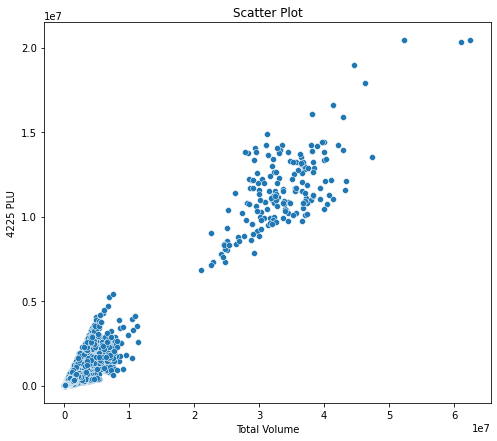

In [24]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("4225 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="4225",data=df)
plt.show()

 Most of Total volume of avocado contains 0-1 4225 pLU avocados

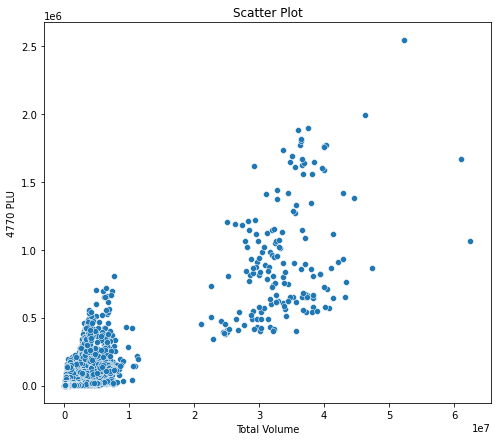

In [25]:
plt.figure(figsize=(8,7))
plt.xlabel("Total Volume")
plt.ylabel("4770 PLU")
plt.title("Scatter Plot")
sns.scatterplot(x="Total Volume",y="4770",data=df)
plt.show()

 Most of Total volume of avocado contains 0-1 4770 pLU avocados

# DATA CLEANING

In [6]:
df_date=sorted(df['Date'].unique())
df_date

['2015-01-04',
 '2015-01-11',
 '2015-01-18',
 '2015-01-25',
 '2015-02-01',
 '2015-02-08',
 '2015-02-15',
 '2015-02-22',
 '2015-03-01',
 '2015-03-08',
 '2015-03-15',
 '2015-03-22',
 '2015-03-29',
 '2015-04-05',
 '2015-04-12',
 '2015-04-19',
 '2015-04-26',
 '2015-05-03',
 '2015-05-10',
 '2015-05-17',
 '2015-05-24',
 '2015-05-31',
 '2015-06-07',
 '2015-06-14',
 '2015-06-21',
 '2015-06-28',
 '2015-07-05',
 '2015-07-12',
 '2015-07-19',
 '2015-07-26',
 '2015-08-02',
 '2015-08-09',
 '2015-08-16',
 '2015-08-23',
 '2015-08-30',
 '2015-09-06',
 '2015-09-13',
 '2015-09-20',
 '2015-09-27',
 '2015-10-04',
 '2015-10-11',
 '2015-10-18',
 '2015-10-25',
 '2015-11-01',
 '2015-11-08',
 '2015-11-15',
 '2015-11-22',
 '2015-11-29',
 '2015-12-06',
 '2015-12-13',
 '2015-12-20',
 '2015-12-27',
 '2016-01-03',
 '2016-01-10',
 '2016-01-17',
 '2016-01-24',
 '2016-01-31',
 '2016-02-07',
 '2016-02-14',
 '2016-02-21',
 '2016-02-28',
 '2016-03-06',
 '2016-03-13',
 '2016-03-20',
 '2016-03-27',
 '2016-04-03',
 '2016-04-

Sorted dates

# Encoding

In [7]:
def date_encode(df,column,order):
    df=df.copy()
    df[column]=df[column].apply(lambda x :order.index(x))
    return df

Encode soted date using functions

In [8]:
data=date_encode(df,'Date',df_date)
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now we can observe the date column is changed

In [9]:
le=LabelEncoder()
data['region']=le.fit_transform(data['region'])

Encoded region column using label encoder

In [30]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


we can obseve the region column encoded

In [31]:
data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

region column after encoding

In [32]:
print(data['region'].value_counts())

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64


We can observe imbalance of data in our target variable

In [33]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [10]:
data=pd.get_dummies(data,columns=['type'])

encode type column using creating dummy varibales

In [35]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,1,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,1,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,1,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,1,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53,0,1
8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53,0,1
9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53,0,1
10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53,0,1


we can observe the type column where encoded

# Outliers Removal

In [11]:
from scipy.stats import zscore
z=np.abs(zscore(data))
avocado=data[(z<3).all(axis=1)]

Removed outliers using zscore

In [37]:
data.shape

(18249, 14)

shape of dataframe before removing outliers

In [38]:
avocado.shape

(17651, 14)

After removing outliers

In [39]:
print("Percentage of data loss after removing outliers:",(18249-17651)/18249*100)

Percentage of data loss after removing outliers: 3.276891884486821


We have lost 3.25% of data after removing outliers it is not big loss so i proceed with that

# Correlation

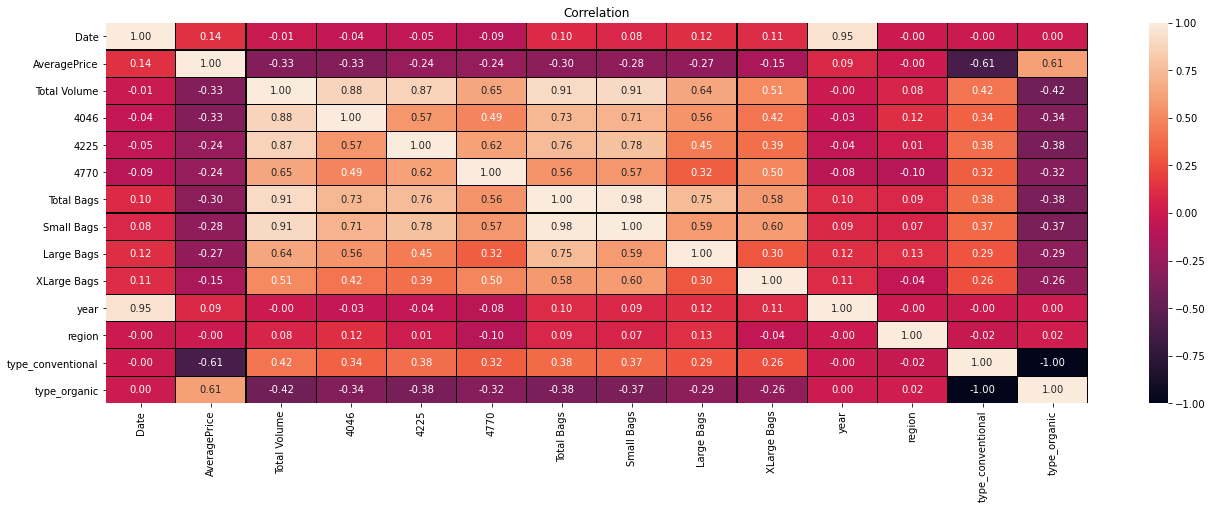

In [40]:
plt.figure(figsize=(22,7))
sns.heatmap(avocado.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.title("Correlation")
plt.show()

Here total bags and total volume are highly correlated most of the inputs are least correlated to target variable

# Seperating features and target

In [12]:
x=avocado.drop('region', axis = 1)
y = avocado['region']

Seperated features and target

In [42]:
x.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_conventional,type_organic
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,0


Sample features

In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

Sample target

# Multi Collinearity

# VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
#checking values
vif

,vif,features
0,1.093383e+01,Date
1,1.793782e+00,AveragePrice
2,4.128023e+08,Total Volume
3,7.777170e+07,4046
4,6.410922e+07,4225
5,4.787438e+05,4770
6,1.924615e+13,Total Bags
7,1.275807e+13,Small Bags
8,1.290985e+12,Large Bags
9,6.647365e+09,XLarge Bags


Checked multi collinearity among features here it is fine

# Scaling

In [13]:
sc=StandardScaler()
x=sc.fit_transform(x)

scaled our features

# PCA

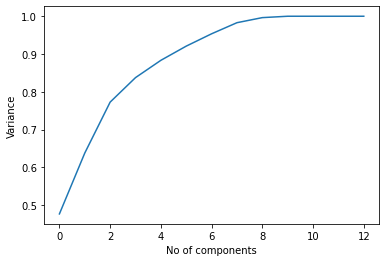

In [46]:
pca=PCA()
components=pca.fit_transform(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("Variance")
plt.show()

Here we plot scree plot for checking which no of components have the variance. Here I choose no of components 8 which have about 96% of variance

In [47]:
pca=PCA(n_components=8)
new=pca.fit_transform(x)
pca_x=pd.DataFrame(new,columns=['PC!','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

Here we apply pca in features and make dataframesfor each components

In [48]:
pca_x

,PC!,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.407845,-1.835191,-0.899117,0.147548,-0.053021,-0.713693,-0.021001,0.182787
1,-0.427510,-1.832886,-0.877719,0.155396,-0.051176,-0.749230,-0.014599,0.211220
2,-0.143891,-2.145883,-1.248707,-0.038829,0.163705,-0.043314,-0.093528,-0.319048
3,-0.271533,-2.054030,-1.118978,0.028715,0.110726,-0.293452,-0.058386,-0.112550
4,-0.404402,-1.923917,-0.931953,0.120801,0.007340,-0.631845,-0.019341,0.137132
...,...,...,...,...,...,...,...,...
17646,-1.510756,2.628804,-0.245377,0.069083,-0.246630,0.640375,-0.142898,-0.018464
17647,-1.563815,2.668828,-0.165686,0.110728,-0.307521,0.507024,-0.127529,0.076153
17648,-1.639280,2.768709,-0.000151,0.198902,-0.428077,0.244211,-0.095092,0.262386
17649,-1.663298,2.800366,0.067248,0.226131,-0.470956,0.139139,-0.087874,0.326401


Dataframe

Here we can't split training and testing data after applying pca because we added dummies in features therefore datas in feature increased so we can't apply pca 

# Balancing Target Variable

# Over Sampling

In [14]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Balanced data using smote technique

In [50]:
y.value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
53    338
6     338
47    338
Name: region, dtype: int64

Balanced data

In [51]:
pca_x.shape

(17651, 8)

In [52]:
y.shape

(18252,)

In [53]:
x.shape

(18252, 13)

Here features and target have diffrent shapes after applying pca

# Model Building

In [54]:
#logistic regression
lr=LogisticRegression()
l=[]
for i in range(0,70):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training accuarcy is:- 0.43544962673789467
At random state 0,the testing accuracy is:- 0.4081073678444262


At random state 1,the training accuarcy is:- 0.4242860078076844
At random state 1,the testing accuracy is:- 0.41577649958915364


At random state 1 model performs well
At random state 2,the training accuarcy is:- 0.4290117115266078
At random state 2,the testing accuracy is:- 0.4133114215283484


At random state 3,the training accuarcy is:- 0.42517635778371343
At random state 3,the testing accuracy is:- 0.4171459874007121


At random state 4,the training accuarcy is:- 0.42832682692966234
At random state 4,the testing accuracy is:- 0.42125445083538754


At random state 5,the training accuarcy is:- 0.4307239230189713
At random state 5,the testing accuracy is:- 0.4086551629690496


At random state 6,the training accuarcy is:- 0.4272995000342442
At random state 6,the testing accuracy is:- 0.4171459874007121


At random state 7,the training accuarcy is:- 0.4317512

At random state 61,the training accuarcy is:- 0.42969659612355315
At random state 61,the testing accuracy is:- 0.4130375239660367


At random state 62,the training accuarcy is:- 0.42682008081638245
At random state 62,the testing accuracy is:- 0.40975075321829635


At random state 63,the training accuarcy is:- 0.4242860078076844
At random state 63,the testing accuracy is:- 0.4187893727745823


At random state 63 model performs well
At random state 64,the training accuarcy is:- 0.43079241147866587
At random state 64,the testing accuracy is:- 0.4007121336620104


At random state 65,the training accuarcy is:- 0.42682008081638245
At random state 65,the testing accuracy is:- 0.4185154752122706


At random state 66,the training accuarcy is:- 0.42818985001027327
At random state 66,the testing accuracy is:- 0.42015886058614077


At random state 67,the training accuarcy is:- 0.43312101910828027
At random state 67,the testing accuracy is:- 0.416324294713777


At random state 68,the training accua

Fitted data and finding best randomstates and spltted into training and testing

In [55]:
l

[1, 21, 24, 33, 38, 43, 56, 63]

List of best random states

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
acc_l=classification_report(y_test,predlr)
print(acc_l)
print(confusion_matrix(y_test,predlr))

              precision    recall  f1-score   support

           0       0.52      0.44      0.48        75
           1       0.33      0.26      0.29        68
           2       0.68      0.54      0.60        71
           3       0.20      0.63      0.30        65
           4       0.41      0.38      0.39        64
           5       0.49      0.34      0.40        68
           6       0.49      0.78      0.61        55
           7       0.46      0.43      0.45        76
           8       0.75      0.41      0.53        73
           9       0.34      0.61      0.43        54
          10       0.21      0.25      0.22        61
          11       0.41      0.45      0.43        77
          12       0.74      0.43      0.54        72
          13       0.56      0.43      0.49        72
          14       0.61      0.28      0.38        71
          15       0.46      0.84      0.59        51
          16       0.77      0.37      0.50        65
          17       0.24    

Accuracy score and confusion matrix

In [57]:
#decision tree classifier
dt=DecisionTreeClassifier()
d=[]
for i in range(0,70):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.796768008764722


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.8225143796220213


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.8112845795672419


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.8079978088195016


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.816488633251164


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.8151191454396056


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.8132018625034237


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.8058066283210079


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy is

Fitted data and finding best randomstates and spltted into training and testing

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=67)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
acc_l=classification_report(y_test,preddt)
print(acc_l)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        80
           1       0.65      0.74      0.70        74
           2       0.87      0.91      0.89        75
           3       0.80      0.78      0.79        81
           4       0.94      0.83      0.88        58
           5       0.69      0.75      0.72        65
           6       0.96      0.97      0.97        78
           7       0.74      0.89      0.81        65
           8       0.99      0.96      0.97        69
           9       0.83      0.75      0.79        73
          10       0.71      0.63      0.67        67
          11       0.95      0.86      0.90        64
          12       0.81      0.88      0.84        57
          13       0.69      0.72      0.70        71
          14       0.80      0.82      0.81        62
          15       0.97      0.92      0.95        76
          16       0.87      0.92      0.89        71
          17       0.76    

Accuracy score is 81% not bad

In [59]:
#support vector classifier
sv=SVC()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=69)
sv.fit(x_train,y_train)
predsv=sv.predict(x_test)
acc_l=classification_report(y_test,predsv)
print(acc_l)
print(confusion_matrix(y_test,predsv))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        73
           1       0.69      0.34      0.45        65
           2       0.38      0.54      0.44        56
           3       0.26      0.40      0.31        63
           4       0.82      0.36      0.50        64
           5       0.28      0.24      0.26        62
           6       0.67      0.76      0.71        58
           7       0.23      0.38      0.29        60
           8       0.51      0.62      0.56        85
           9       0.30      0.37      0.33        67
          10       0.17      0.12      0.14        51
          11       0.40      0.46      0.43        76
          12       0.68      0.49      0.57        57
          13       0.85      0.30      0.45        76
          14       0.76      0.19      0.30        70
          15       0.35      0.78      0.48        58
          16       0.64      0.39      0.48        70
          17       0.39    

Accuracy score, it givs low accuracy

In [60]:
#random forest classifier
rf=RandomForestClassifier()
r=[]
for i in range(0,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuarcy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training accuarcy is:- 1.0
At random state 0,the testing accuracy is:- 0.913722267871816


At random state 1,the training accuarcy is:- 1.0
At random state 1,the testing accuracy is:- 0.9227608874281019


At random state 2,the training accuarcy is:- 1.0
At random state 2,the testing accuracy is:- 0.9213913996165434


At random state 3,the training accuarcy is:- 1.0
At random state 3,the testing accuracy is:- 0.9219391947411668


At random state 4,the training accuarcy is:- 1.0
At random state 4,the testing accuracy is:- 0.9211175020542317


At random state 5,the training accuarcy is:- 1.0
At random state 5,the testing accuracy is:- 0.9175568337441796


At random state 6,the training accuarcy is:- 1.0
At random state 6,the testing accuracy is:- 0.9249520679265955


At random state 7,the training accuarcy is:- 1.0
At random state 7,the testing accuracy is:- 0.9153656532456861


At random state 8,the training accuarcy is:- 1.0
At random state 8,the testing accuracy i

Splitted into train and test data find accuracy score find beat random states

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
acc_l=classification_report(y_test,predrf)
print(acc_l)
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        62
           1       0.88      0.87      0.88        77
           2       0.94      1.00      0.97        61
           3       0.89      0.92      0.90        51
           4       0.95      0.95      0.95        77
           5       0.89      0.82      0.85        67
           6       1.00      1.00      1.00        64
           7       0.86      0.92      0.89        72
           8       0.99      0.99      0.99        73
           9       0.95      0.91      0.93        67
          10       0.87      0.91      0.89        66
          11       0.86      0.96      0.91        57
          12       0.96      0.97      0.96        70
          13       0.91      0.92      0.91        63
          14       0.93      0.94      0.93        83
          15       1.00      0.97      0.98        67
          16       0.97      0.95      0.96        65
          17       0.92    

Accuracy score is 92%

# Cross Validation Score

In [62]:
print("CV score and it's mean of Logistic Regression:",cross_val_score(lr,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predlr))
print("CV score and it's mean of Decision Tree Classifier:",cross_val_score(dt,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,preddt))
print("CV score and it's mean of Support Vector Classfier:",cross_val_score(sv,x,y,cv=8).mean(),"Accuracy score:",accuracy_score(y_test,predsv))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"Accuarcy score:",accuracy_score(y_test,predrf))

CV score and it's mean of Logistic Regression: 0.3594170549611334 Accuracy score: 0.017803341550260202
CV score and it's mean of Decision Tree Classifier: 0.6451256492973814 Accuracy score: 0.015612161051766639
CV score and it's mean of Support Vector Classfier: 0.3566215317174494 Accuracy score: 0.01972062448644207
CV score and it's mean of Random Forest: 0.8022037688161281 Accuarcy score: 0.9197480142426733


Least difference in cv score and accuracy score is Random forest classifier so I prefer random forest classifier

# Hyper Parameter Tuning

In [63]:
parameter={'n_estimators': np.arange(30,50),
           'max_depth':np.arange(2,7),
          'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2']}

Stored parameters in variable

In [64]:
gv=GridSearchCV(rf,parameter,cv=6)

Instance variable of grid search cv

In [ ]:
gv.fit(x_train,y_train)

Fitted data

In [ ]:
gv.best_params_

Best parameters

In [16]:
best=RandomForestClassifier(criterion='entropy',max_depth=9,max_features='auto',n_estimators=26)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(accuracy_score(y_test,predbest))
print(acc_b*100)

82.77449046679816


Apply best parameters 

# Saving model

In [17]:
import joblib as jb
jb.dump(best,"Best_model.pkl")

['Best_model.pkl']

Saved into .pkl file

# Conclusion

In [21]:
a=np.array(y_test)
predicted=np.array(best.predict(x_test))
HR=pd.DataFrame({"Original:":a,"Predicted":predicted},index=range(len(a)))
HR

,Original:,Predicted
0,50,50
1,52,52
2,49,49
3,43,43
4,5,5
...,...,...
4558,41,41
4559,10,10
4560,51,51
4561,7,7


Original and predicted value